In [ ]:
import tensorflow as tf
import os 
from tensorflow.keras.models import load_model

os.path.join('photo')
from google.colab import drive
drive.mount("/content/gdrive") 

new_model = tf.keras.models.load_model("/content/gdrive/My Drive/photos/models/imgclass.h5")

new_model.summary()

Mounted at /content/gdrive
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      9280      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPoolin

In [ ]:
import cv2
import matplotlib.pyplot as plt

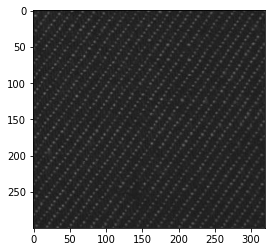

In [ ]:
img1 = cv2.imread('/content/gdrive/My Drive/photos//photo/saglam/s (376).jpg') #Burada verisetinden örnek bir veri kullanılıyor
plt.imshow(img1)
plt.show()

In [ ]:
resize = tf.image.resize(img1,(256,256)) #yukarıdaki resim yeniden boyutlandırılıp uygun bir hale getiriliyor.
resize.shape


TensorShape([256, 256, 3])

In [ ]:
import numpy as np

yhat = new_model.predict(np.expand_dims(resize/255,0)) #Burada yukarıdaki resim hakkında bir tahmin sonucu dönüyor.
print("%.17f" %yhat)

1/1 [==============================] - 7s 7s/step
0.99738818407058716


In [ ]:
from tensorflow.keras.preprocessing import image #Burada tensorflow içinde bulunan image'i import ediyoruz

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('/content/gdrive/My Drive/photos/photo') #Kullanılacak verisetinin bulunduğu dosyaya erişerek içerik hakkında bilgi alıyoruz.

Found 2100 files belonging to 2 classes.


In [ ]:
len(data)

66

In [ ]:
data_iterator = data.as_numpy_iterator()  # Burada verisetinin ögeleri numpy ögesine dönüştürülüyor.
batch = data_iterator.next() #Burada sürekli olarak bir sonraki elemana geçiş yapmak için next fonksiyonu kullanılıyor.
batch[0].shape #ögenin boyut bilgisini öğrenmek için kullanılıyor.

(32, 256, 256, 3)

In [ ]:
batch[1] #Burada 0 ve 1'lerden oluşan array yazdırılıyor.

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0], dtype=int32)

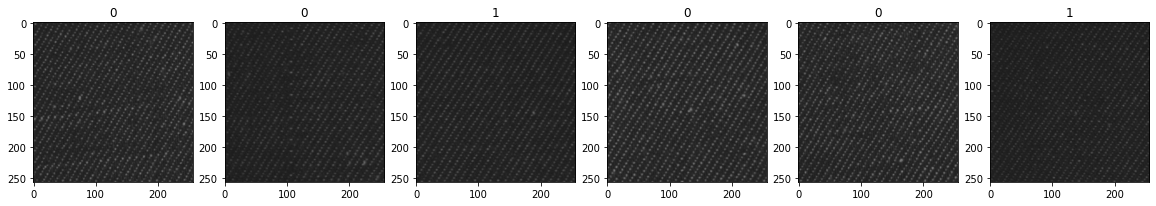

In [ ]:
fig,ax = plt.subplots(ncols=6,figsize=(20,20)) #Bu kısımda örnek olarak 6 resim matplotlib ile çıktıda gösteriliyor. (0 başlıklı olanlar hatalı, 1 başlıklı olanlar sağlam)
for idx,img in enumerate(batch[0][:6]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [ ]:
data = data.map(lambda x,y:(x/255,y))   #Burada veriler kullanıma daha uygun olacak şekilde yeniden boyutlandırılıyor.
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()

In [ ]:
batch[0].max() #Burada kontrol amaçlı yeni boyutlandırmada bulunan en yüksek değer yazdırılıyor.

0.69467676

In [ ]:
train_size = int(len(data)* .70)+1  #Burada veriler train,test ve validation olarak 3 gruba ayrıldığında sahip olacakları büyüklükler belirleniyor.
test_size = int(len(data)*0.1)
val_size = int(len(data)*0.2)

train_size + test_size + val_size

66

In [ ]:
train = data.take(train_size) #Burada gruplara yukarıdan belirlenmiş boyutlarına uygun olacak şekilde veriler dağıtılıyor.
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)
print(test_size)

6


In [ ]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy
pre = Precision()
re = Recall()
acc = BinaryAccuracy()
res = []
for batch in test.as_numpy_iterator():
  X,y = batch
  yhat = new_model.predict(X)
  pre.update_state(y,yhat)
  re.update_state(y,yhat)
  acc.update_state(y,yhat)
  res.append(tf.math.confusion_matrix(y,yhat.round()))

1/1 [==============================] - 0s 33ms/step


In [ ]:
print("re: ",re.result().numpy())
print("pre: ",pre.result().numpy())
print("acc: ",acc.result().numpy())
print("Confusion Matrix")
print(sum(res))

re:  0.96666664
pre:  0.96666664
acc:  0.9777778
Confusion Matrix
tf.Tensor(
[[118   2]
 [  2  58]], shape=(2, 2), dtype=int32)
